# DNSC 6212 Data Management Final Project -- Group 17

# Part 1 - Selection (30 points)

Identify and describe your dataset, its source, and what appeals to you about it.  Acquire the data and perform an initial exploration to determine which themes you wish to explore. Describe the questions you want to be able to answer with the data, any concerns you have about the data, and any challenges you expect to have to overcome.

## Dataset and questions

We wanted to analyze the distribution of emergency incidents happened in modern cities and how fire departments performed. We chose a dataset detailing emergency incidents in New York City because New York City is the most famous large mordern city and the data was easily accessible. We found the dataset, [Fire Incident Dispatch Data](https://data.cityofnewyork.us/Public-Safety/Fire-Incident-Dispatch-Data/8m42-w767), through the New York City Open Data website. Since the data are from 2012 to 2018, with about 2.75 million records, we only filter the data in year 2016 to analyze. The dataset provides information on the date of the emergencies, the location of the emergencies, the severity of the emergencies, and the response time of the emergencies, among other variables. For example, we can identify the location of the emergencies through the borough or neighborhood of New York City, along with drilling down to the exact zip code and even address of the emergencies. We can determine the severity of the emergencies through the Highest Alarm Level column, which provides a scale of 1-7 alarms where the severity of the increases as the number of alarms increases. Additionally, we also have information on response time to the emergencies from the local fire department. This provides us an opportunity to identify and analyze the how certain factors might affect the response time. 

The richness of this dataset is appealing because it provides several potential avenues for analysis. For example, we can identify geographical areas that might have a higher propensity of emergency incidents. Furthermore, we can also identify geographical areas that have a higher propensity for severe emergencies because these are the types of emergencies that can cause severe physical and emotional consequences. Finally, we may also want to identify areas, such as zip codes, that have a higher propensity to show long response times because coupling the likelihood of a severe emergencies with a long response time can lead to tragic events. By identifying this information to the Fire Department of New York City, we can help prevent these tragic events from occurring in the future. 

In addition to researching these ideas, we also want to analyze how certain weather conditions might affect the likelihood and severity of an emergency, especially fire. So, we also plan to include weather data from Kaggle, [Historical Hourly Weather Data 2012-2017](https://www.kaggle.com/selfishgene/historical-hourly-weather-data#weather_description.csv), to provide an even richer analysis of scenarios that we might expect to cause tragic events. For example, we expect warm, dry, and windy weathers to provide the most likely conditions for a severe fire. By combining this weather information with the incident data, we can make a thorough recommendation to the New York City Fire Department to help prevent a tragic emergencies that can cause the loss of life, property, and emotional well-being.

## Obtain the `fire_incidents` data

In [1]:
!wget -O fire_incidents.csv https://s3.amazonaws.com/2018-istm6212-group17/2016_Fire_Incident_Dispatch_Data.csv

--2018-12-10 05:27:20--  https://s3.amazonaws.com/2018-istm6212-group17/2016_Fire_Incident_Dispatch_Data.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.236.205
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.236.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 176682255 (168M) [text/csv]
Saving to: ‘fire_incidents.csv’

fire_incidents.csv  100%[===================>] 168.50M  44.1MB/s    in 3.8s    

2018-12-10 05:27:24 (43.8 MB/s) - ‘fire_incidents.csv’ saved [176682255/176682255]



## Examine the data

***Number of records***

In [2]:
!wc -l fire_incidents.csv

585523 fire_incidents.csv


In [3]:
!csvstat --count fire_incidents.csv

Row count: 585522


Both show that there are total 585522 records.

***Variable names***

In [4]:
!csvcut -n fire_incidents.csv

  1: STARFIRE_INCIDENT_ID
  2: INCIDENT_DATETIME
  3: ALARM_BOX_BOROUGH
  4: ALARM_BOX_NUMBER
  5: ALARM_BOX_LOCATION
  6: INCIDENT_BOROUGH
  7: ZIPCODE
  8: POLICEPRECINCT
  9: CITYCOUNCILDISTRICT
 10: COMMUNITYDISTRICT
 11: COMMUNITYSCHOOLDISTRICT
 12: CONGRESSIONALDISTRICT
 13: ALARM_SOURCE_DESCRIPTION_TX
 14: ALARM_LEVEL_INDEX_DESCRIPTION
 15: HIGHEST_ALARM_LEVEL
 16: INCIDENT_CLASSIFICATION
 17: INCIDENT_CLASSIFICATION_GROUP
 18: DISPATCH_RESPONSE_SECONDS_QY
 19: FIRST_ASSIGNMENT_DATETIME
 20: FIRST_ACTIVATION_DATETIME
 21: FIRST_ON_SCENE_DATETIME
 22: INCIDENT_CLOSE_DATETIME
 23: VALID_DISPATCH_RSPNS_TIME_INDC
 24: VALID_INCIDENT_RSPNS_TIME_INDC
 25: INCIDENT_RESPONSE_SECONDS_QY
 26: INCIDENT_TRAVEL_TM_SECONDS_QY
 27: ENGINES_ASSIGNED_QUANTITY
 28: LADDERS_ASSIGNED_QUANTITY
 29: OTHER_UNITS_ASSIGNED_QUANTITY


***Basic statistics of each variable***

In [5]:
!head -n 10000 fire_incidents.csv | csvstat --snifflimit 0

  1. "STARFIRE_INCIDENT_ID"

	Type of data:          Number
	Contains null values:  False
	Unique values:         9999
	Smallest value:        160,046,041,015
	Largest value:         1,600,798,760,150,102
	Sum:                   16,000,756,198,407,744,257
	Mean:                  1,600,235,643,405,114.937
	Median:                1,600,412,110,140,197
	StDev:                 16,004,216,073,912.616
	Most common values:    1,600,123,850,140,001 (1x)
	                       1,600,125,490,620,001 (1x)
	                       1,600,191,770,150,002 (1x)
	                       1,600,115,560,140,002 (1x)
	                       1,600,132,410,120,004 (1x)

  2. "INCIDENT_DATETIME"

	Type of data:          DateTime
	Contains null values:  False
	Unique values:         9896
	Smallest value:        2016-01-01 00:00:43
	Largest value:         2016-01-07 07:38:27
	Most common values:    2016-01-02 09:16:53 (3x)
	                       2016-01-01 00:19:54 (2x)
	                       2016-01-01 00:36:

Based on our initial research ideas and basic exploratory analysis, we have identified a few key variables that will play an important role in our analysis. These variables include the Alarm Box Borough, Zip Code, Highest Alarm Level, Incident Classification Group, and various response time metrics. 

Since the dataset came from a valid source and also provided a data dictionary, we identified that the Alarm Box Borough represents where the neighorbood where the incident alarm rang, Zip Code represents the Zip Code where the incident occurred, Highest Alarm Level provides a proxy for the severity of the incident, and Incident Classification Group provides a categorical filing of the incident, such as Medical Emergencies, Medical First Aid, and Fires. 

The various response time metrics include dispatch time, travel time, and full response time for the New York City Fire Department. These response time metrics provide a quality option for representing our Facts within the relational database design.

## Schema

***The schema of our original dataset***

In [6]:
from IPython.display import Image
Image(url = "https://s3.amazonaws.com/2018-istm6212-group17/original_dataset.png", width = 320, height = 500)

***Based on the dataset, we will build a star schema like this***

In [7]:
from IPython.display import Image
Image(url = "https://s3.amazonaws.com/2018-istm6212-group17/star_schema_original.png")

We considered multiple options for the fact table. For example, we had the option of choosing either response time metrics or other options, such as Engines or Ladders assigned by incident. If we needed to include these facts, we could have implemented a multiple fact table design. These additional facts may provide a proxy for the severity of an incident, however, the data also provides the Highest Alarm Level variable that can be used to measure the severity of the incident. Additionally, we are more interested in understanding the factors that might affect response times, so we decided to not include the additional facts and multiple fact table design.

# Part 2 - Wrangling (35 points)

Based on what you found above, wrangle the data into a format suitable for analysis. This may involve cleaning, filtering, merging, and modeling steps, any and all of which are valid for this project. Describe your process as you proceed, and document any scripts, databases, or other models you develop. Be specific about any key decisions to modify or remove data, how you overcame any challenges, and all assumptions you make about the meaning of variables and their values.

Verify that your wrangling steps have succeeded (for example, if you loaded the data into a dimensional model, ensure that the fact table contains the right number of records).

## Create and connect to a new database

In [8]:
%load_ext sql

In [9]:
!dropdb -U student proj4_group17

In [10]:
!createdb -U student proj4_group17

In [11]:
%sql postgresql://student@/proj4_group17

'Connected: student@proj4_group17'

## Create a temporary table `incidents`

***Create a temporary table `incidents`***

In [12]:
%%sql
DROP TABLE IF EXISTS incidents;

CREATE TABLE incidents (
    id NUMERIC NOT NULL,
    incident_datetime TIMESTAMP NOT NULL,
    alarm_box_borough VARCHAR(30) NOT NULL,
    alarm_box_number INTEGER NOT NULL,
    alarm_box_location VARCHAR(500) NOT NULL,
    incident_borough VARCHAR(30) NOT NULL,
    zipcode INTEGER,
    police_precinct INTEGER,
    city_council_district INTEGER,
    community_district INTEGER,
    community_school_district INTEGER,
    congressional_district INTEGER,
    alarm_source_description_tx VARCHAR(30) NOT NULL,
    alarm_level_index_description VARCHAR(100) NOT NULL,
    highest_alarm_level VARCHAR(30) NOT NULL,
    incident_classification VARCHAR(100) NOT NULL,
    incident_classification_group VARCHAR(30) NOT NULL,
    dispatch_rspns_s_qy INTEGER,
    first_assignment_datetime TIMESTAMP,
    first_activation_datetime TIMESTAMP,
    first_on_scene_datetime TIMESTAMP,
    incident_close_datetime TIMESTAMP,
    valid_dispatch_rspns_time_indc BOOLEAN,
    valid_incident_rspns_time_indc BOOLEAN,
    incident_rspns_s_qy INTEGER,
    incident_travel_s_qy INTEGER,
    engines_assigned_quantity INTEGER,
    ladders_assigned_quantity INTEGER,
    other_units_assigned_quantity INTEGER
);

 * postgresql://student@/proj4_group17
Done.
Done.


[]

***Load the data using `COPY` command***

In [13]:
!cp fire_incidents.csv /tmp/fire_incidents.csv

In [14]:
%%sql
COPY incidents 
FROM '/tmp/fire_incidents.csv'
CSV
HEADER;

 * postgresql://student@/proj4_group17
585522 rows affected.


[]

***Check the number of records in this table***

In [15]:
%%sql
SELECT COUNT(*)
FROM incidents;

 * postgresql://student@/proj4_group17
1 rows affected.


count
585522


***Take a look at the data***

In [16]:
%%sql
SELECT *
FROM incidents
LIMIT 5;

 * postgresql://student@/proj4_group17
5 rows affected.


id,incident_datetime,alarm_box_borough,alarm_box_number,alarm_box_location,incident_borough,zipcode,police_precinct,city_council_district,community_district,community_school_district,congressional_district,alarm_source_description_tx,alarm_level_index_description,highest_alarm_level,incident_classification,incident_classification_group,dispatch_rspns_s_qy,first_assignment_datetime,first_activation_datetime,first_on_scene_datetime,incident_close_datetime,valid_dispatch_rspns_time_indc,valid_incident_rspns_time_indc,incident_rspns_s_qy,incident_travel_s_qy,engines_assigned_quantity,ladders_assigned_quantity,other_units_assigned_quantity
1600123850140001,2016-01-01 00:00:43,BROOKLYN,2385,AVENUE K & E 82 ST,BROOKLYN,11236,69,46,318,18,8,Private Fire Alarm,Initial Alarm,First Alarm,Carbon Monoxide - Code 1 - Investigation,NonMedical Emergencies,67,2016-01-01 00:01:50,2016-01-01 00:02:24,2016-01-01 00:07:16,2016-01-01 00:10:26,False,True,393,326,1,1,0
1600125490620001,2016-01-01 00:01:34,BRONX,2549,WESTCHESTER AVE & FAILE ST,BRONX,10459,41,17,202,8,15,UCT/911,Initial Alarm,First Alarm,Demolition Debris or Rubbish Fire,NonStructural Fires,12,2016-01-01 00:01:46,2016-01-01 00:02:11,2016-01-01 00:09:14,2016-01-01 00:18:22,False,True,460,448,1,0,0
1600191770150002,2016-01-01 00:01:39,QUEENS,9177,98 ST & 63 DR,QUEENS,11374,112,29,406,28,6,PD Link/Medical,Initial Alarm,First Alarm,Medical - PD Link 10-91,Medical Emergencies,11,2016-01-01 00:01:50,2016-01-01 00:02:19,None,2016-01-01 00:05:55,False,False,0,0,1,0,0
1600115560140002,2016-01-01 00:02:20,BROOKLYN,1556,OCEAN AVE & ALBEMARLE RD,BROOKLYN,11226,70,40,314,22,9,PD Link/Medical,Initial Alarm,First Alarm,Medical - PD Link 10-91,Medical Emergencies,6,2016-01-01 00:02:26,2016-01-01 00:02:41,None,2016-01-01 00:05:11,False,False,0,0,1,0,0
1600132410120004,2016-01-01 00:02:25,BRONX,3241,SACKETT & RADCLIFF AVES,BRONX,10462,49,13,211,11,14,UCT/911,Initial Alarm,First Alarm,Alarm System - Unnecessary,NonMedical Emergencies,11,2016-01-01 00:02:36,2016-01-01 00:03:03,2016-01-01 00:06:45,2016-01-01 00:15:18,False,True,260,249,3,2,1


## Wrangle the data

`dispatch_response_seconds_qy` = `first_assignment_datetime` - `incident_datetime` <br>
`incident_travel_tm_seconds_qy` = `first_on_scene_datetime` - `first_assignment_datetime` <br>
`incident_response_seconds_qy` = `first_on_scene_datetime` - `incident_datetime` = `dispatch_response_seconds_qy` + `incident_travel_s_qy`

Based on the provided data, we identified multiple response time metrics, quantified in seconds, as potential facts for our Fact table. These response time metrics have different formulations that can be identified through other variables in the dataset. For example, the dispatch response time is a function of the first assignment time and the incident time. Then, the travel time is a function of first responder on scene time less the first assignment time. <br>
From the basic statistics of each columns, we notice that there are 0s in those three time variables, which are irrational. After checking the dataset, we find the reason is that there are null values in `first_assignment_datetime` and `first_on_scene_datetime`. Thus, these 0s should have been NULLs as well, which is a data quality issue.

***Identify the number of records with 0 in `dispatch_reponse_seconds_qy`, `incident_travel_tm_seconds_qy` or `incident_response_seconds_qy`***

In [17]:
%%sql
SELECT COUNT(*)
FROM incidents
WHERE (dispatch_rspns_s_qy = 0
    OR incident_rspns_s_qy = 0
    OR incident_travel_s_qy = 0);

 * postgresql://student@/proj4_group17
1 rows affected.


count
89330


***Identify the number of records with null values in `first_assignment_datetime` or `first_on_scene_datetime`***

In [18]:
%%sql
SELECT COUNT(*)
FROM incidents
WHERE first_assignment_datetime IS NULL
    OR first_on_scene_datetime IS NULL;

 * postgresql://student@/proj4_group17
1 rows affected.


count
89327


***Note that there are 3 records with 0s in time variables but no null value in datetime variable***

In [19]:
%%sql
SELECT id, incident_datetime, first_assignment_datetime, first_activation_datetime, first_on_scene_datetime,
    dispatch_rspns_s_qy, incident_rspns_s_qy, incident_travel_s_qy
FROM incidents
WHERE (dispatch_rspns_s_qy = 0
    OR incident_rspns_s_qy = 0
    OR incident_travel_s_qy = 0)
    AND first_assignment_datetime IS NOT NULL
    AND first_on_scene_datetime IS NOT NULL
LIMIT 10;

 * postgresql://student@/proj4_group17
3 rows affected.


id,incident_datetime,first_assignment_datetime,first_activation_datetime,first_on_scene_datetime,dispatch_rspns_s_qy,incident_rspns_s_qy,incident_travel_s_qy
1604708820140290,2016-02-16 02:45:48,2016-02-16 02:46:12,2016-02-16 02:46:22,2016-02-16 02:46:12,24,24,0
1610936140120350,2016-04-18 14:02:51,2016-04-18 14:03:05,2016-04-18 14:05:01,2016-04-18 14:03:05,14,14,0
161682184012,2016-06-16 03:13:53,2016-06-16 03:17:36,2016-06-16 03:14:25,2016-06-16 03:16:41,223,168,0


Notice that for the first and second records above, the `first_assignment_datetime` and `first_assignment_datetime` are the same. And for the last one, the `first_assignment_datetime` is later than `first_assignment_datetime`, which is irrational as well. We consider those three records as wrong. Since there are only three wrong records, we decide to drop them.

***Drop those three wrong records***

In [20]:
%%sql
DELETE FROM incidents 
WHERE id IN (1604708820140290, 1610936140120350, 161682184012);

 * postgresql://student@/proj4_group17
3 rows affected.


[]

***Turn `0`s in the columns about time (dispatch, response & travel) to `NULL`s***

In [21]:
%%sql
UPDATE incidents
SET dispatch_rspns_s_qy = NULL
WHERE dispatch_rspns_s_qy = 0;

UPDATE incidents
SET incident_rspns_s_qy = NULL
WHERE incident_rspns_s_qy = 0;

UPDATE incidents
SET incident_travel_s_qy = NULL
WHERE incident_travel_s_qy = 0;

 * postgresql://student@/proj4_group17
2751 rows affected.
89294 rows affected.
89327 rows affected.


[]

***Take a look at the wrangled data***

In [22]:
%%sql
SELECT *
FROM incidents
ORDER BY incident_datetime
LIMIT 5;

 * postgresql://student@/proj4_group17
5 rows affected.


id,incident_datetime,alarm_box_borough,alarm_box_number,alarm_box_location,incident_borough,zipcode,police_precinct,city_council_district,community_district,community_school_district,congressional_district,alarm_source_description_tx,alarm_level_index_description,highest_alarm_level,incident_classification,incident_classification_group,dispatch_rspns_s_qy,first_assignment_datetime,first_activation_datetime,first_on_scene_datetime,incident_close_datetime,valid_dispatch_rspns_time_indc,valid_incident_rspns_time_indc,incident_rspns_s_qy,incident_travel_s_qy,engines_assigned_quantity,ladders_assigned_quantity,other_units_assigned_quantity
1600123850140001,2016-01-01 00:00:43,BROOKLYN,2385,AVENUE K & E 82 ST,BROOKLYN,11236,69,46,318,18,8,Private Fire Alarm,Initial Alarm,First Alarm,Carbon Monoxide - Code 1 - Investigation,NonMedical Emergencies,67,2016-01-01 00:01:50,2016-01-01 00:02:24,2016-01-01 00:07:16,2016-01-01 00:10:26,False,True,393,326,1,1,0
1600125490620001,2016-01-01 00:01:34,BRONX,2549,WESTCHESTER AVE & FAILE ST,BRONX,10459,41,17,202,8,15,UCT/911,Initial Alarm,First Alarm,Demolition Debris or Rubbish Fire,NonStructural Fires,12,2016-01-01 00:01:46,2016-01-01 00:02:11,2016-01-01 00:09:14,2016-01-01 00:18:22,False,True,460,448,1,0,0
1600191770150002,2016-01-01 00:01:39,QUEENS,9177,98 ST & 63 DR,QUEENS,11374,112,29,406,28,6,PD Link/Medical,Initial Alarm,First Alarm,Medical - PD Link 10-91,Medical Emergencies,11,2016-01-01 00:01:50,2016-01-01 00:02:19,None,2016-01-01 00:05:55,False,False,None,None,1,0,0
1600115560140002,2016-01-01 00:02:20,BROOKLYN,1556,OCEAN AVE & ALBEMARLE RD,BROOKLYN,11226,70,40,314,22,9,PD Link/Medical,Initial Alarm,First Alarm,Medical - PD Link 10-91,Medical Emergencies,6,2016-01-01 00:02:26,2016-01-01 00:02:41,None,2016-01-01 00:05:11,False,False,None,None,1,0,0
1600132410120004,2016-01-01 00:02:25,BRONX,3241,SACKETT & RADCLIFF AVES,BRONX,10462,49,13,211,11,14,UCT/911,Initial Alarm,First Alarm,Alarm System - Unnecessary,NonMedical Emergencies,11,2016-01-01 00:02:36,2016-01-01 00:03:03,2016-01-01 00:06:45,2016-01-01 00:15:18,False,True,260,249,3,2,1


## Create the fact and dimension tables

### Create the `rspns_time_facts` table

***Create the `rspns_time_facts` table***

In [23]:
%%sql
DROP TABLE IF EXISTS rspns_time_facts;

CREATE TABLE rspns_time_facts
AS (SELECT * FROM incidents ORDER BY incident_datetime);

 * postgresql://student@/proj4_group17
Done.
585519 rows affected.


[]

***Drop the useless columns***

In [24]:
%%sql
ALTER TABLE rspns_time_facts 
DROP COLUMN engines_assigned_quantity,
DROP COLUMN ladders_assigned_quantity,
DROP COLUMN other_units_assigned_quantity;

 * postgresql://student@/proj4_group17
Done.


[]

***Take a look at the `rspns_time_facts` table***

In [25]:
%%sql
SELECT *
FROM rspns_time_facts
LIMIT 5;

 * postgresql://student@/proj4_group17
5 rows affected.


id,incident_datetime,alarm_box_borough,alarm_box_number,alarm_box_location,incident_borough,zipcode,police_precinct,city_council_district,community_district,community_school_district,congressional_district,alarm_source_description_tx,alarm_level_index_description,highest_alarm_level,incident_classification,incident_classification_group,dispatch_rspns_s_qy,first_assignment_datetime,first_activation_datetime,first_on_scene_datetime,incident_close_datetime,valid_dispatch_rspns_time_indc,valid_incident_rspns_time_indc,incident_rspns_s_qy,incident_travel_s_qy
1600123850140001,2016-01-01 00:00:43,BROOKLYN,2385,AVENUE K & E 82 ST,BROOKLYN,11236,69,46,318,18,8,Private Fire Alarm,Initial Alarm,First Alarm,Carbon Monoxide - Code 1 - Investigation,NonMedical Emergencies,67,2016-01-01 00:01:50,2016-01-01 00:02:24,2016-01-01 00:07:16,2016-01-01 00:10:26,False,True,393,326
1600125490620001,2016-01-01 00:01:34,BRONX,2549,WESTCHESTER AVE & FAILE ST,BRONX,10459,41,17,202,8,15,UCT/911,Initial Alarm,First Alarm,Demolition Debris or Rubbish Fire,NonStructural Fires,12,2016-01-01 00:01:46,2016-01-01 00:02:11,2016-01-01 00:09:14,2016-01-01 00:18:22,False,True,460,448
1600191770150002,2016-01-01 00:01:39,QUEENS,9177,98 ST & 63 DR,QUEENS,11374,112,29,406,28,6,PD Link/Medical,Initial Alarm,First Alarm,Medical - PD Link 10-91,Medical Emergencies,11,2016-01-01 00:01:50,2016-01-01 00:02:19,None,2016-01-01 00:05:55,False,False,None,None
1600115560140002,2016-01-01 00:02:20,BROOKLYN,1556,OCEAN AVE & ALBEMARLE RD,BROOKLYN,11226,70,40,314,22,9,PD Link/Medical,Initial Alarm,First Alarm,Medical - PD Link 10-91,Medical Emergencies,6,2016-01-01 00:02:26,2016-01-01 00:02:41,None,2016-01-01 00:05:11,False,False,None,None
1600132410120004,2016-01-01 00:02:25,BRONX,3241,SACKETT & RADCLIFF AVES,BRONX,10462,49,13,211,11,14,UCT/911,Initial Alarm,First Alarm,Alarm System - Unnecessary,NonMedical Emergencies,11,2016-01-01 00:02:36,2016-01-01 00:03:03,2016-01-01 00:06:45,2016-01-01 00:15:18,False,True,260,249


### Drop the temporary table

In [26]:
%%sql
DROP TABLE IF EXISTS incidents;

 * postgresql://student@/proj4_group17
Done.


[]

### Create the `alarm_box` dimension table

***Create the `alarm_box` dimension table***

In [27]:
%%sql
DROP TABLE IF EXISTS alarm_box;

CREATE TABLE alarm_box (
    key SERIAL PRIMARY KEY,
    borough VARCHAR(30) NOT NULL,
    number INTEGER NOT NULL,
    location VARCHAR(500) NOT NULL,
    zipcode INTEGER,
    police_precinct INTEGER,
    city_council_district INTEGER,
    community_district INTEGER,
    community_school_district INTEGER,
    congressional_district INTEGER
);

 * postgresql://student@/proj4_group17
Done.
Done.


[]

***Populate the dimension table with unique values***

In [28]:
%%sql
INSERT INTO alarm_box
    (borough, number, location, zipcode, police_precinct,
     city_council_district, community_district,
     community_school_district, congressional_district)
SELECT DISTINCT alarm_box_borough AS borough,
    alarm_box_number AS number,
    alarm_box_location AS location,
    zipcode, police_precinct, city_council_district,
    community_district, community_school_district,
    congressional_district
FROM rspns_time_facts
ORDER BY zipcode, number;

 * postgresql://student@/proj4_group17
34206 rows affected.


[]

***Take a look at the `alarm_box` dimension table***

In [29]:
%%sql
SELECT * FROM alarm_box LIMIT 5;

 * postgresql://student@/proj4_group17
5 rows affected.


key,borough,number,location,zipcode,police_precinct,city_council_district,community_district,community_school_district,congressional_district
1,MANHATTAN,934,6 AVE & W 59 ST,10000,22,6,164,3,10
2,MANHATTAN,968,5 AVE & 64 ST,10000,22,6,164,3,10
3,MANHATTAN,973,CENTRAL PARK W. & 65 ST,10000,22,6,164,3,10
4,MANHATTAN,974,MADISON AVE & 65 ST,10000,22,6,164,3,10
5,MANHATTAN,985,CENTRAL PARK W. & 67 ST,10000,22,6,164,3,10


In [30]:
%%sql
SELECT COUNT(*) FROM alarm_box;

 * postgresql://student@/proj4_group17
1 rows affected.


count
34206


***Add a foreign key column to the fact table that references `alarm_box` dimension table***

In [31]:
%%sql
ALTER TABLE rspns_time_facts 
ADD COLUMN alarm_box_key INTEGER,
ADD CONSTRAINT fk_alarm_box_key
    FOREIGN KEY (alarm_box_key)
    REFERENCES alarm_box (key);

 * postgresql://student@/proj4_group17
Done.


[]

***Create an index on all columns in `alarm_box` to improve the performance of queries***

In [32]:
%%sql
DROP INDEX IF EXISTS idx_alarm_box;

CREATE INDEX idx_alarm_box ON alarm_box
    (borough, number, location, zipcode, police_precinct,
     city_council_district, community_district,
     community_school_district, congressional_district);

 * postgresql://student@/proj4_group17
Done.
Done.


[]

***Populate `alarm_box_key` with correct values***

In [33]:
%%sql
UPDATE rspns_time_facts
SET alarm_box_key = alarm_box.key
FROM alarm_box
WHERE rspns_time_facts.alarm_box_borough = alarm_box.borough
    AND rspns_time_facts.alarm_box_number = alarm_box.number
    AND rspns_time_facts.alarm_box_location = alarm_box.location
    AND ((rspns_time_facts.zipcode IS NULL AND alarm_box.zipcode IS NULL)
         OR rspns_time_facts.zipcode = alarm_box.zipcode)
    AND ((rspns_time_facts.police_precinct IS NULL AND alarm_box.police_precinct IS NULL)
         OR rspns_time_facts.police_precinct = alarm_box.police_precinct)
    AND ((rspns_time_facts.city_council_district IS NULL AND alarm_box.city_council_district IS NULL)
         OR rspns_time_facts.city_council_district = alarm_box.city_council_district)
    AND ((rspns_time_facts.community_district IS NULL AND alarm_box.community_district IS NULL)
         OR rspns_time_facts.community_district = alarm_box.community_district)
    AND ((rspns_time_facts.community_school_district IS NULL AND alarm_box.community_school_district IS NULL)
         OR rspns_time_facts.community_school_district = alarm_box.community_school_district)
    AND ((rspns_time_facts.congressional_district IS NULL AND alarm_box.congressional_district IS NULL)
         OR rspns_time_facts.congressional_district = alarm_box.congressional_district);

 * postgresql://student@/proj4_group17
585519 rows affected.


[]

***Check the foreign key column***

In [34]:
%%sql
SELECT id, alarm_box_key
FROM rspns_time_facts
LIMIT 5;

 * postgresql://student@/proj4_group17
5 rows affected.


id,alarm_box_key
1600125490620001,8548
1600155921550268,25347
1600135290120283,31053
1600191780450452,22007
1600142530150474,22762


In [35]:
%%sql
SELECT COUNT(*) AS alarm_box_key_not_null_count
FROM rspns_time_facts
WHERE alarm_box_key IS NOT NULL;

 * postgresql://student@/proj4_group17
1 rows affected.


alarm_box_key_not_null_count
585519


In [36]:
%%sql
SELECT COUNT(*) AS alarm_box_key_null_count
FROM rspns_time_facts
WHERE alarm_box_key IS NULL;

 * postgresql://student@/proj4_group17
1 rows affected.


alarm_box_key_null_count
0


### Create the `alarm` dimension table

***Create the `alarm` dimension table***

In [37]:
%%sql
DROP TABLE IF EXISTS alarm;

CREATE TABLE alarm (
    key SERIAL PRIMARY KEY,
    source VARCHAR(30) NOT NULL,
    level_index VARCHAR(100) NOT NULL,
    highest_level VARCHAR(30) NOT NULL
);

 * postgresql://student@/proj4_group17
Done.
Done.


[]

***Populate the dimension table with unique values***

In [38]:
%%sql
INSERT INTO alarm
    (source, level_index, highest_level)
SELECT DISTINCT alarm_source_description_tx AS source,
    alarm_level_index_description AS level_index,
    highest_alarm_level AS highest_level
FROM rspns_time_facts
ORDER BY source, level_index, highest_level;

 * postgresql://student@/proj4_group17
60 rows affected.


[]

***Take a look at the `alarm` dimension table***

In [39]:
%%sql
SELECT * FROM alarm LIMIT 5;

 * postgresql://student@/proj4_group17
5 rows affected.


key,source,level_index,highest_level
1,BARS,7-5 (All Hands Alarm),All Hands Working
2,BARS,DEFAULT RECORD,First Alarm
3,BARS,Initial Alarm,First Alarm
4,BARS,Second Alarm,Second Alarm
5,DEFAULT RECORD,DEFAULT RECORD,First Alarm


In [40]:
%%sql
SELECT COUNT(*) FROM alarm;

 * postgresql://student@/proj4_group17
1 rows affected.


count
60


***Add a foreign key column to the fact table that references `alarm` dimension table***

In [41]:
%%sql
ALTER TABLE rspns_time_facts 
ADD COLUMN alarm_key INTEGER,
ADD CONSTRAINT fk_alarm_key
    FOREIGN KEY (alarm_key)
    REFERENCES alarm (key);

 * postgresql://student@/proj4_group17
Done.


[]

***Create an index on all columns in `alarm` to improve the performance of queries***

In [42]:
%%sql
DROP INDEX IF EXISTS idx_alarm;

CREATE INDEX idx_alarm ON alarm
    (source, level_index, highest_level);

 * postgresql://student@/proj4_group17
Done.
Done.


[]

***Populate `alarm_key` with correct values***

In [43]:
%%sql
UPDATE rspns_time_facts
SET alarm_key = alarm.key
FROM alarm
WHERE rspns_time_facts.alarm_source_description_tx = alarm.source
    AND rspns_time_facts.alarm_level_index_description = alarm.level_index
    AND rspns_time_facts.highest_alarm_level = alarm.highest_level;

 * postgresql://student@/proj4_group17
585519 rows affected.


[]

***Check the foreign key column***

In [44]:
%%sql
SELECT id, alarm_key
FROM rspns_time_facts
LIMIT 5;

 * postgresql://student@/proj4_group17
5 rows affected.


id,alarm_key
1600191780450452,51
1600142530150474,10
1600115040240821,30
1600132280120752,51
1600215560110094,17


In [45]:
%%sql
SELECT COUNT(*) AS alarm_key_not_null_count
FROM rspns_time_facts
WHERE alarm_key IS NOT NULL;

 * postgresql://student@/proj4_group17
1 rows affected.


alarm_key_not_null_count
585519


In [46]:
%%sql
SELECT COUNT(*) AS alarm_key_null_count
FROM rspns_time_facts
WHERE alarm_key IS NULL;

 * postgresql://student@/proj4_group17
1 rows affected.


alarm_key_null_count
0


### Create the `incident_class` dimension table

***Create the `incident_class` dimension table***

In [47]:
%%sql
DROP TABLE IF EXISTS incident_class;

CREATE TABLE incident_class (
    key SERIAL PRIMARY KEY,
    class_des VARCHAR(100) NOT NULL,
    group_des VARCHAR(30) NOT NULL
);

 * postgresql://student@/proj4_group17
Done.
Done.


[]

***Populate the dimension table with unique values***

In [48]:
%%sql
INSERT INTO incident_class
    (class_des, group_des)
SELECT DISTINCT incident_classification AS class_des,
    incident_classification_group AS group_des
FROM rspns_time_facts
ORDER BY group_des, class_des;

 * postgresql://student@/proj4_group17
65 rows affected.


[]

***Take a look at the `incident_class` dimension table***

In [49]:
%%sql
SELECT * FROM incident_class LIMIT 5;

 * postgresql://student@/proj4_group17
5 rows affected.


key,class_des,group_des
1,Medical - Assist Civilian,Medical Emergencies
2,Medical - EMS Link 10-91,Medical Emergencies
3,Medical - PD Link 10-91,Medical Emergencies
4,Medical MFA - EMS Link,Medical MFAs
5,Medical MFA - PD Link,Medical MFAs


In [50]:
%%sql
SELECT COUNT(*) FROM incident_class;

 * postgresql://student@/proj4_group17
1 rows affected.


count
65


***Add a foreign key column to the fact table that references `incident_class` dimension table***

In [51]:
%%sql
ALTER TABLE rspns_time_facts 
ADD COLUMN incident_class_key INTEGER,
ADD CONSTRAINT fk_incident_class_key
    FOREIGN KEY (incident_class_key)
    REFERENCES incident_class (key);

 * postgresql://student@/proj4_group17
Done.


[]

***Create an index on all columns in `incident_class` to improve the performance of queries***

In [52]:
%%sql
DROP INDEX IF EXISTS idx_incident_class;

CREATE INDEX idx_incident_class ON incident_class
    (class_des, group_des);

 * postgresql://student@/proj4_group17
Done.
Done.


[]

***Populate `incident_class_key` with correct values***

In [53]:
%%sql
UPDATE rspns_time_facts
SET incident_class_key = incident_class.key
FROM incident_class
WHERE rspns_time_facts.incident_classification = incident_class.class_des
    AND rspns_time_facts.incident_classification_group = incident_class.group_des;

 * postgresql://student@/proj4_group17
585519 rows affected.


[]

***Check the foreign key column***

In [54]:
%%sql
SELECT id, incident_class_key
FROM rspns_time_facts
LIMIT 5;

 * postgresql://student@/proj4_group17
5 rows affected.


id,incident_class_key
1600215560110094,35
1600222980120142,1
1600208680140221,3
1600213710440291,9
1600255200150447,3


In [55]:
%%sql
SELECT COUNT(*) AS incident_class_key_not_null_count
FROM rspns_time_facts
WHERE incident_class_key IS NOT NULL;

 * postgresql://student@/proj4_group17
1 rows affected.


incident_class_key_not_null_count
585519


In [56]:
%%sql
SELECT COUNT(*) AS incident_class_key_null_count
FROM rspns_time_facts
WHERE incident_class_key IS NULL;

 * postgresql://student@/proj4_group17
1 rows affected.


incident_class_key_null_count
0


### Create the `valid_respns` dimension table

***Create the `valid_respns` dimension table***

In [57]:
%%sql
DROP TABLE IF EXISTS valid_rspns;

CREATE TABLE valid_rspns (
    key SERIAL PRIMARY KEY,
    valid_dispatch_rspns BOOLEAN,
    valid_incident_rspns BOOLEAN
);

 * postgresql://student@/proj4_group17
Done.
Done.


[]

***Populate the dimension table with unique values***

In [58]:
%%sql
INSERT INTO valid_rspns
    (valid_dispatch_rspns, valid_incident_rspns)
SELECT DISTINCT valid_dispatch_rspns_time_indc AS valid_dispatch_rspns,
    valid_incident_rspns_time_indc AS valid_incident_rspns
FROM rspns_time_facts
ORDER BY valid_dispatch_rspns, valid_dispatch_rspns;

 * postgresql://student@/proj4_group17
2 rows affected.


[]

***Take a look at the `valid_respns` dimension table***

In [59]:
%%sql
SELECT * FROM valid_rspns LIMIT 10;

 * postgresql://student@/proj4_group17
2 rows affected.


key,valid_dispatch_rspns,valid_incident_rspns
1,False,False
2,False,True


In [60]:
%%sql
SELECT COUNT(*) FROM valid_rspns;

 * postgresql://student@/proj4_group17
1 rows affected.


count
2


***Add a foreign key column to the fact table that references `valid_respns` dimension table***

In [61]:
%%sql
ALTER TABLE rspns_time_facts 
ADD COLUMN valid_rspns_key INTEGER,
ADD CONSTRAINT fk_valid_rspns_key
    FOREIGN KEY (valid_rspns_key)
    REFERENCES valid_rspns (key);

 * postgresql://student@/proj4_group17
Done.


[]

***Create an index on all columns in `valid_respns` to improve the performance of queries***

In [62]:
%%sql
DROP INDEX IF EXISTS idx_valid_rspns;

CREATE INDEX idx_valid_rspns ON valid_rspns
    (valid_dispatch_rspns, valid_incident_rspns);

 * postgresql://student@/proj4_group17
Done.
Done.


[]

***Populate `valid_rspns_key` with correct values***

In [63]:
%%sql
UPDATE rspns_time_facts
SET valid_rspns_key = valid_rspns.key
FROM valid_rspns
WHERE rspns_time_facts.valid_dispatch_rspns_time_indc = valid_rspns.valid_dispatch_rspns
    AND rspns_time_facts.valid_incident_rspns_time_indc = valid_rspns.valid_incident_rspns;

 * postgresql://student@/proj4_group17
585519 rows affected.


[]

***Check the foreign key column***

In [64]:
%%sql
SELECT id, valid_rspns_key
FROM rspns_time_facts
LIMIT 5;

 * postgresql://student@/proj4_group17
5 rows affected.


id,valid_rspns_key
1600255200150447,1
1600203270540916,2
1600221030120534,2
1600321390150087,2
1600338400140194,1


In [65]:
%%sql
SELECT COUNT(*) AS valid_rspns_key_not_null_count
FROM rspns_time_facts
WHERE valid_rspns_key IS NOT NULL;

 * postgresql://student@/proj4_group17
1 rows affected.


valid_rspns_key_not_null_count
585519


In [66]:
%%sql
SELECT COUNT(*) AS valid_rspns_key_null_count
FROM rspns_time_facts
WHERE valid_rspns_key IS NULL;

 * postgresql://student@/proj4_group17
1 rows affected.


valid_rspns_key_null_count
0


### Create the `hour` dimension table

***Create the `hour` dimension table***

In [67]:
%%sql
DROP TABLE IF EXISTS hour;

CREATE TABLE hour (
    key SERIAL PRIMARY KEY,
    hour CHAR(19),
    day CHAR(10),
    year INTEGER,
    quarter_of_year INTEGER,
    month_of_year_str VARCHAR(12),
    month_of_year INTEGER,
    day_of_month INTEGER,
    day_of_week_str CHAR(9),
    day_of_week INTEGER,
    is_weekend BOOLEAN,
    hour_of_day INTEGER
);

 * postgresql://student@/proj4_group17
Done.
Done.


[]

***Check the values in `incident_datetime` and `incident_close_datetime`***

In [68]:
%%sql
SELECT COUNT(*)
FROM
(SELECT DISTINCT TO_CHAR(incident_datetime, 'YYYY-MM-DD HH24:00:00') AS hour,
    TO_CHAR(incident_datetime, 'YYYY-MM-DD') AS day, 
    CAST(TO_CHAR(incident_datetime, 'YYYY') AS INTEGER) AS year,
    CAST(TO_CHAR(incident_datetime, 'Q') AS INTEGER) AS quarter_of_year,
    TO_CHAR(incident_datetime, 'Month') AS month_of_year_str,
    CAST(TO_CHAR(incident_datetime, 'MM') AS INTEGER) AS month_of_year,
    CAST(TO_CHAR(incident_datetime, 'DD') AS INTEGER) AS day_of_month,
    TO_CHAR(incident_datetime, 'Day') AS day_of_week_str,
    CAST(TO_CHAR(incident_datetime, 'D') AS INTEGER) AS day_of_week,
    CASE WHEN CAST(TO_CHAR(incident_datetime, 'D') AS INTEGER) IN (1, 7)
        THEN True
        ELSE False
    END AS is_weekend,
    CAST(TO_CHAR(incident_datetime, 'HH24') AS INTEGER) AS hour_of_day
FROM rspns_time_facts) AS T;

 * postgresql://student@/proj4_group17
1 rows affected.


count
8784


In [69]:
%%sql
SELECT COUNT(*)
FROM
(SELECT DISTINCT TO_CHAR(incident_close_datetime, 'YYYY-MM-DD HH24:00:00') AS hour,
    TO_CHAR(incident_close_datetime, 'YYYY-MM-DD') AS day, 
    CAST(TO_CHAR(incident_close_datetime, 'YYYY') AS INTEGER) AS year,
    CAST(TO_CHAR(incident_close_datetime, 'Q') AS INTEGER) AS quarter_of_year,
    TO_CHAR(incident_close_datetime, 'Month') AS month_of_year_str,
    CAST(TO_CHAR(incident_close_datetime, 'MM') AS INTEGER) AS month_of_year,
    CAST(TO_CHAR(incident_close_datetime, 'DD') AS INTEGER) AS day_of_month,
    TO_CHAR(incident_close_datetime, 'Day') AS day_of_week_str,
    CAST(TO_CHAR(incident_close_datetime, 'D') AS INTEGER) AS day_of_week,
    CASE WHEN CAST(TO_CHAR(incident_close_datetime, 'D') AS INTEGER) IN (1, 7)
        THEN True
        ELSE False
    END AS is_weekend,
    CAST(TO_CHAR(incident_close_datetime, 'HH24') AS INTEGER) AS hour_of_day
FROM rspns_time_facts) AS T;

 * postgresql://student@/proj4_group17
1 rows affected.


count
8786


***Populate the dimension table with unique values***

In [70]:
%%sql
INSERT INTO hour (hour, day, year, quarter_of_year, month_of_year_str, month_of_year, 
                  day_of_month, day_of_week_str, day_of_week, is_weekend, hour_of_day)
SELECT DISTINCT TO_CHAR(incident_datetime, 'YYYY-MM-DD HH24:00:00') AS hour,
    TO_CHAR(incident_datetime, 'YYYY-MM-DD') AS day, 
    CAST(TO_CHAR(incident_datetime, 'YYYY') AS INTEGER) AS year,
    CAST(TO_CHAR(incident_datetime, 'Q') AS INTEGER) AS quarter_of_year,
    TO_CHAR(incident_datetime, 'Month') AS month_of_year_str,
    CAST(TO_CHAR(incident_datetime, 'MM') AS INTEGER) AS month_of_year,
    CAST(TO_CHAR(incident_datetime, 'DD') AS INTEGER) AS day_of_month,
    TO_CHAR(incident_datetime, 'Day') AS day_of_week_str,
    CAST(TO_CHAR(incident_datetime, 'D') AS INTEGER) AS day_of_week,
    CASE WHEN CAST(TO_CHAR(incident_datetime, 'D') AS INTEGER) IN (1, 7)
        THEN True
        ELSE False
    END AS is_weekend,
    CAST(TO_CHAR(incident_datetime, 'HH24') AS INTEGER) AS hour_of_day
FROM rspns_time_facts
UNION
SELECT DISTINCT TO_CHAR(incident_close_datetime, 'YYYY-MM-DD HH24:00:00') AS hour,
    TO_CHAR(incident_close_datetime, 'YYYY-MM-DD') AS day, 
    CAST(TO_CHAR(incident_close_datetime, 'YYYY') AS INTEGER) AS year,
    CAST(TO_CHAR(incident_close_datetime, 'Q') AS INTEGER) AS quarter_of_year,
    TO_CHAR(incident_close_datetime, 'Month') AS month_of_year_str,
    CAST(TO_CHAR(incident_close_datetime, 'MM') AS INTEGER) AS month_of_year,
    CAST(TO_CHAR(incident_close_datetime, 'DD') AS INTEGER) AS day_of_month,
    TO_CHAR(incident_close_datetime, 'Day') AS day_of_week_str,
    CAST(TO_CHAR(incident_close_datetime, 'D') AS INTEGER) AS day_of_week,
    CASE WHEN CAST(TO_CHAR(incident_close_datetime, 'D') AS INTEGER) IN (1, 7)
        THEN True
        ELSE False
    END AS is_weekend,
    CAST(TO_CHAR(incident_close_datetime, 'HH24') AS INTEGER) AS hour_of_day
FROM rspns_time_facts
ORDER BY year, month_of_year, day_of_month, hour_of_day;

 * postgresql://student@/proj4_group17
8786 rows affected.


[]

***Take a look at the `hour` dimension table***

In [71]:
%%sql
SELECT * FROM hour LIMIT 5;

 * postgresql://student@/proj4_group17
5 rows affected.


key,hour,day,year,quarter_of_year,month_of_year_str,month_of_year,day_of_month,day_of_week_str,day_of_week,is_weekend,hour_of_day
1,2016-01-01 00:00:00,2016-01-01,2016,1,January,1,1,Friday,6,False,0
2,2016-01-01 01:00:00,2016-01-01,2016,1,January,1,1,Friday,6,False,1
3,2016-01-01 02:00:00,2016-01-01,2016,1,January,1,1,Friday,6,False,2
4,2016-01-01 03:00:00,2016-01-01,2016,1,January,1,1,Friday,6,False,3
5,2016-01-01 04:00:00,2016-01-01,2016,1,January,1,1,Friday,6,False,4


***Add foreign key columns to the fact table that references `hour` dimension table***

In [72]:
%%sql
ALTER TABLE rspns_time_facts
ADD COLUMN incident_hour_key INTEGER,
ADD CONSTRAINT fk_incident_hour_key
    FOREIGN KEY (incident_hour_key)
    REFERENCES hour (key);
    
ALTER TABLE rspns_time_facts
ADD COLUMN incident_close_hour_key INTEGER,
ADD CONSTRAINT fk_incident_close_hour_key
    FOREIGN KEY (incident_close_hour_key)
    REFERENCES hour (key);

 * postgresql://student@/proj4_group17
Done.
Done.


[]

***Populate foreign key columns with correct values***

In [73]:
%%sql
UPDATE rspns_time_facts
SET incident_hour_key = hour.key
FROM hour
WHERE TO_CHAR(rspns_time_facts.incident_datetime, 'YYYY-MM-DD HH24:00:00') = hour.hour;

 * postgresql://student@/proj4_group17
585519 rows affected.


[]

In [74]:
%%sql
UPDATE rspns_time_facts
SET incident_close_hour_key = hour.key
FROM hour
WHERE TO_CHAR(rspns_time_facts.incident_close_datetime, 'YYYY-MM-DD HH24:00:00') = hour.hour;

 * postgresql://student@/proj4_group17
585519 rows affected.


[]

***Check the foreign key column***

In [75]:
%%sql
SELECT id, incident_hour_key, incident_close_hour_key
FROM rspns_time_facts
LIMIT 5;

 * postgresql://student@/proj4_group17
5 rows affected.


id,incident_hour_key,incident_close_hour_key
1600321390150087,54,54
1600338400140194,58,58
1600362930150157,60,61
1600309770110284,60,60
1600398000150174,60,60


In [76]:
%%sql
SELECT
(SELECT COUNT(*) FROM rspns_time_facts WHERE incident_hour_key IS NOT NULL) AS incident_hour_key_not_null_count,
(SELECT COUNT(*) FROM rspns_time_facts WHERE incident_close_hour_key IS NOT NULL) AS incident_close_hour_key_not_null_count;

 * postgresql://student@/proj4_group17
1 rows affected.


incident_hour_key_not_null_count,incident_close_hour_key_not_null_count
585519,585519


In [77]:
%%sql
SELECT
(SELECT COUNT(*) FROM rspns_time_facts WHERE incident_hour_key IS NULL) AS incident_hour_key_null_count,
(SELECT COUNT(*) FROM rspns_time_facts WHERE incident_close_hour_key IS NULL) AS incident_close_hour_key_null_count;

 * postgresql://student@/proj4_group17
1 rows affected.


incident_hour_key_null_count,incident_close_hour_key_null_count
0,0


### Drop the useless columns

In [78]:
%%sql
ALTER TABLE rspns_time_facts 
DROP COLUMN incident_datetime,
DROP COLUMN alarm_box_borough,
DROP COLUMN alarm_box_number,
DROP COLUMN alarm_box_location,
DROP COLUMN incident_borough,
DROP COLUMN zipcode,
DROP COLUMN police_precinct,
DROP COLUMN city_council_district,
DROP COLUMN community_district,
DROP COLUMN community_school_district,
DROP COLUMN congressional_district,
DROP COLUMN alarm_source_description_tx,
DROP COLUMN alarm_level_index_description,
DROP COLUMN highest_alarm_level,
DROP COLUMN incident_classification,
DROP COLUMN incident_classification_group,
DROP COLUMN first_assignment_datetime,
DROP COLUMN first_activation_datetime,
DROP COLUMN first_on_scene_datetime,
DROP COLUMN incident_close_datetime,
DROP COLUMN valid_dispatch_rspns_time_indc,
DROP COLUMN valid_incident_rspns_time_indc;

 * postgresql://student@/proj4_group17
Done.


[]

In [79]:
%%sql
SELECT * FROM rspns_time_facts LIMIT 10;

 * postgresql://student@/proj4_group17
10 rows affected.


id,dispatch_rspns_s_qy,incident_rspns_s_qy,incident_travel_s_qy,alarm_box_key,alarm_key,incident_class_key,valid_rspns_key,incident_hour_key,incident_close_hour_key
1600321390150087,9,226,217,24001,51,26,2,54,54
1600338400140194,None,None,None,31357,59,1,1,58,58
1600362930150157,73,544,471,32496,51,6,2,60,61
1600309770110284,57,455,398,28189,14,1,2,60,60
1600398000150174,9,None,None,25983,10,2,1,60,60
1600398190150180,6,None,None,25769,10,2,1,61,61
1600325280120369,42,330,288,30019,13,33,2,63,63
1600309270110578,4,None,None,1919,10,2,1,67,67
1600328780120584,4,None,None,9052,10,2,1,67,67
1600336540120618,4,None,None,10325,24,3,1,68,68


# Part 3 - Analysis (35 points)

Explore and analyze your data in its wrangled form. Follow through on the themes you identified in Part 1 with queries or scripts that answer the questions you had in mind. Be clear about the answers you discover, discussing them and whether the results match your expectations. Include charts or other visuals that support your analysis. You may use Tableau, matplotlib, ggplot, or other tools we have not covered in class for visualization (and only for visualization), but be sure to export images from those tools and to include any images properly in your notebook writeup and slides.

## Show Tables in our database

In [80]:
%%sql
\dt

 * postgresql://student@/proj4_group17
6 rows affected.


Schema,Name,Type,Owner
public,alarm,table,student
public,alarm_box,table,student
public,hour,table,student
public,incident_class,table,student
public,rspns_time_facts,table,student
public,valid_rspns,table,student


## Connect the database with Python for Visualization

In [81]:
import psycopg2
import geocoder
import matplotlib.pyplot as plt
import pandas
import numpy as np

conn = psycopg2.connect("dbname='proj4_group17' user='student'")
c = conn.cursor()

## What does the incident distribution by borough look like?

***Check the data we want using SQL***

In [82]:
%%sql
SELECT alarm_box.borough, count(*)
FROM alarm_box, incident_class, rspns_time_facts
WHERE alarm_box.key = rspns_time_facts.alarm_box_key
    AND incident_class.key = rspns_time_facts.incident_class_key
GROUP BY alarm_box.borough;

 * postgresql://student@/proj4_group17
5 rows affected.


borough,count
RICHMOND / STATEN ISLAND,28738
QUEENS,115427
MANHATTAN,158219
BRONX,117702
BROOKLYN,165433


***Discussion***

Brooklyn has the most incidents and Manhattan has the second-highest number of incidents.

Since a visual display can be more appealing than a regular table, we created a bar chart to display the distribution.

***Visualize the data using Python***

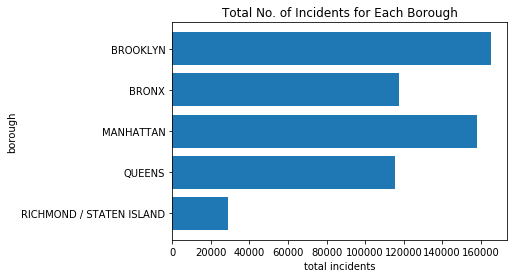

In [83]:
sql = '''
    SELECT alarm_box.borough, count(*)
    FROM alarm_box, incident_class, rspns_time_facts
    WHERE alarm_box.key = rspns_time_facts.alarm_box_key
        AND incident_class.key = rspns_time_facts.incident_class_key
    GROUP BY alarm_box.borough;
'''

c.execute(sql)
rows = c.fetchall()

plt.barh([i[0] for i in rows], [i[1] for i in rows])
plt.xlabel("total incidents")
plt.ylabel("borough")
plt.title("Total No. of Incidents for Each Borough")
plt.show()

## How is each type of incidents distributed for each borough?

***Check the data we want using SQL***

In [84]:
%%sql
SELECT alarm_box.borough, incident_class.group_des, count(*)
FROM alarm_box, incident_class, rspns_time_facts
WHERE alarm_box.key = rspns_time_facts.alarm_box_key
    AND incident_class.key = rspns_time_facts.incident_class_key
GROUP BY alarm_box.borough, incident_class.group_des
ORDER BY alarm_box.borough, incident_class.group_des;

 * postgresql://student@/proj4_group17
30 rows affected.


borough,group_des,count
BRONX,Medical Emergencies,52432
BRONX,Medical MFAs,593
BRONX,NonMedical Emergencies,51681
BRONX,NonMedical MFAs,4738
BRONX,NonStructural Fires,2233
BRONX,Structural Fires,6025
BROOKLYN,Medical Emergencies,77262
BROOKLYN,Medical MFAs,957
BROOKLYN,NonMedical Emergencies,68389
BROOKLYN,NonMedical MFAs,5787


***Discussion***

We can see from the plot that NonMedical Emergencies and Medical Emergencies are occur frequently for all boroughs. Contrary to our original ideas, the fire department actually responds to not only the fire incidents, but also some medical or nonmedical emergencies.

***Visualize the data using Python***

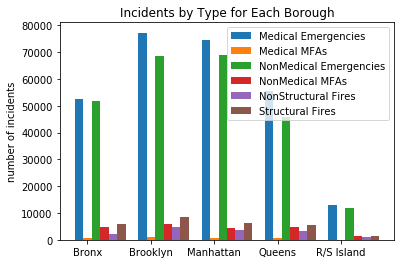

In [85]:
sql = '''
    SELECT alarm_box.borough, incident_class.group_des, count(*)
    FROM alarm_box, incident_class, rspns_time_facts
    WHERE alarm_box.key = rspns_time_facts.alarm_box_key
        AND incident_class.key = rspns_time_facts.incident_class_key
    GROUP BY alarm_box.borough, incident_class.group_des
    ORDER BY alarm_box.borough, incident_class.group_des;
'''

c.execute(sql)
rows = c.fetchall()

subrows1 = [i for i in rows if i[1] == 'Medical Emergencies']
subrows2 = [i for i in rows if i[1] == 'Medical MFAs']
subrows3 = [i for i in rows if i[1] == 'NonMedical Emergencies']
subrows4 = [i for i in rows if i[1] == 'NonMedical MFAs']
subrows5 = [i for i in rows if i[1] == 'NonStructural Fires']
subrows6 = [i for i in rows if i[1] == 'Structural Fires']

ind = np.array([3*i for i in range(5)])
width = 0.4

fig, ax = plt.subplots()
ax.bar(ind,[i[2] for i in subrows1], width, label='Medical Emergencies')
ax.bar(ind + width,[i[2] for i in subrows2], width, label='Medical MFAs')
ax.bar(ind + 2*width,[i[2] for i in subrows3], width, label='NonMedical Emergencies')
ax.bar(ind + 3*width,[i[2] for i in subrows4], width, label='NonMedical MFAs')
ax.bar(ind + 4*width,[i[2] for i in subrows5], width, label='NonStructural Fires')
ax.bar(ind + 5*width,[i[2] for i in subrows6], width, label='Structural Fires')
ax.set_ylabel('number of incidents')
ax.set_title('Incidents by Type for Each Borough')
ax.set_xticks(ind + width)
ax.set_xticklabels(('Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'R/S Island'))
ax.legend()

plt.show()

## What does the fire incident distribution by borough look like? 

Since the dataset contains a high number of incidents that do not involve fires, we filtered out the non-fire incidents to focus more specifically on the information we wanted to analyze.

***Check the data we want using SQL***

In [86]:
%%sql
SELECT alarm_box.borough, count(*)
FROM alarm_box, incident_class, rspns_time_facts
WHERE alarm_box.key = rspns_time_facts.alarm_box_key
    AND incident_class.key = rspns_time_facts.incident_class_key
    AND incident_class.group_des LIKE '%Fire%'
GROUP BY alarm_box.borough;

 * postgresql://student@/proj4_group17
5 rows affected.


borough,count
RICHMOND / STATEN ISLAND,2339
QUEENS,8803
MANHATTAN,9779
BRONX,8258
BROOKLYN,13038


***Discussion***

Based on the table, we can identify that Brooklyn has the most fire incidents. In a similar fashion as previously detailed, we continue to show the distribution figures represented in a bar chart.

***Visualize the data using Python***

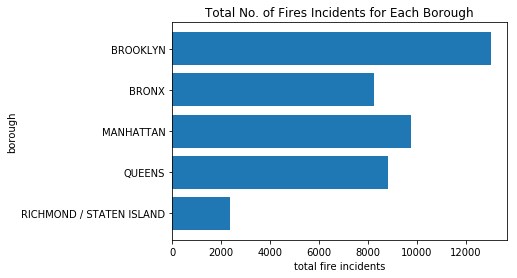

In [87]:
sql = '''
    SELECT alarm_box.borough, count(*)
    FROM alarm_box, incident_class, rspns_time_facts
    WHERE alarm_box.key = rspns_time_facts.alarm_box_key
        AND incident_class.key = rspns_time_facts.incident_class_key
        AND incident_class.group_des LIKE '%Fire%'
    GROUP BY alarm_box.borough;
'''

c.execute(sql)
rows = c.fetchall()

plt.barh([i[0] for i in rows], [i[1] for i in rows])
plt.xlabel("total fire incidents")
plt.ylabel("borough")
plt.title("Total No. of Fires Incidents for Each Borough")
plt.show()

## How is the fire incident severeness distributed for each borough?

***Check the data we want using SQL***

In [88]:
%%sql
SELECT alarm_box.borough, alarm.highest_level, count(*)
FROM alarm_box, alarm, rspns_time_facts, incident_class
WHERE alarm_box.key = rspns_time_facts.alarm_box_key
    AND alarm.key = rspns_time_facts.alarm_key
    AND incident_class.key = rspns_time_facts.incident_class_key
    AND incident_class.group_des LIKE '%Fires%'
GROUP BY alarm_box.borough, alarm.highest_level
ORDER BY alarm_box.borough, alarm.highest_level;

 * postgresql://student@/proj4_group17
35 rows affected.


borough,highest_level,count
BRONX,All Hands Working,356
BRONX,First Alarm,7691
BRONX,Fourth Alarm,3
BRONX,Second Alarm,21
BRONX,Seventh Alarm,183
BRONX,Third Alarm,4
BROOKLYN,All Hands Working,671
BROOKLYN,Fifth Alarm or Higher,4
BROOKLYN,First Alarm,12001
BROOKLYN,Fourth Alarm,3


***Discussion***

First Alarm fire incidents are much more than the others, which skews the data and makes other bars too small if we plot them together in a bar chart.Therefore, we separated the visualizations for first alarm.

Also, we can see from the selected table above, that fourth, fifth, fifth or higher alarm fires didn't happen in all the boroughs, and the numbers are pretty small compared to others. So, we exclude them when visualizing in the bar charts.

We can also see Brooklyn has the most seventh alarm fire incidents, which are the most severe fires represented in the data. The reason might be the large number of incidents happened in Brooklyn. Situations in Queens are severe as well, which has the third most fire incidents but the second most severe fires.

***Visualize the data using Python***

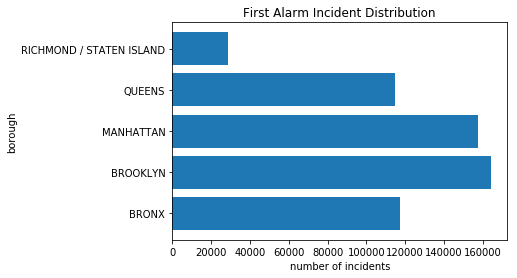

In [89]:
sql = '''
    SELECT alarm_box.borough, alarm.highest_level, count(*)
    FROM alarm_box, alarm, rspns_time_facts
    WHERE alarm_box.key = rspns_time_facts.alarm_box_key
        AND alarm.key = rspns_time_facts.alarm_key
    GROUP BY alarm_box.borough, alarm.highest_level
    ORDER BY alarm_box.borough, alarm.highest_level;
'''

c.execute(sql)
rows = c.fetchall()

subrows = [i for i in rows if i[1] == 'First Alarm']
plt.barh([i[0] for i in subrows], [i[2] for i in subrows])
plt.xlabel("number of incidents")
plt.ylabel("borough")
plt.title("First Alarm Incident Distribution")
plt.show()

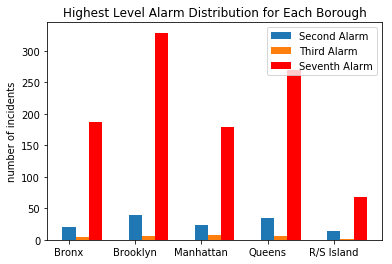

In [90]:
subrows3 = [i for i in rows if i[1] == 'Second Alarm']
subrows4 = [i for i in rows if i[1] == 'Third Alarm']
subrows8 = [i for i in rows if i[1] == 'Seventh Alarm ']

ind = np.array([2*i for i in range(5)])
width = 0.4

fig, ax = plt.subplots()
ax.bar(ind + width,[i[2] for i in subrows3], width, label='Second Alarm')
ax.bar(ind + 2*width,[i[2] for i in subrows4], width, label='Third Alarm')
ax.bar(ind + 3*width,[i[2] for i in subrows8], width, label='Seventh Alarm', color = 'red')
ax.set_ylabel('number of incidents')
ax.set_title('Highest Level Alarm Distribution for Each Borough')
ax.set_xticks(ind + width)
ax.set_xticklabels(('Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'R/S Island'))
ax.legend()

plt.show()

***Discussion***

After filtering out small First Alarm fires, the mid-level Fifth Alarm fires, and the ambiguous All Hands Working category, we can see that the Seven Alarm fires occur much more frequently than the milder Second and Third alarm fires. This should cause concern for the New York City Fire Department because the Seven Alarm fires present a much more dangerous scenario that can lead to significant hardships for those affected by these severe fires. 

## Incident by Quarter of Year for each Borough

***Check the data we want using SQL***

In [91]:
%%sql
SELECT alarm_box.borough, hour.quarter_of_year, count(*)
FROM alarm_box, hour, rspns_time_facts
WHERE alarm_box.key = rspns_time_facts.alarm_box_key
    AND hour.key = rspns_time_facts.incident_hour_key
GROUP BY alarm_box.borough, hour.quarter_of_year
ORDER BY hour.quarter_of_year, alarm_box.borough;

 * postgresql://student@/proj4_group17
20 rows affected.


borough,quarter_of_year,count
BRONX,1,28922
BROOKLYN,1,40688
MANHATTAN,1,38206
QUEENS,1,28712
RICHMOND / STATEN ISLAND,1,7040
BRONX,2,28277
BROOKLYN,2,39771
MANHATTAN,2,38233
QUEENS,2,27548
RICHMOND / STATEN ISLAND,2,7211


***Discussion***

Overall, we can see that the Richmond/Staten Island borough shows less incidents than the other buroughs. For each borough, the number of incidents is not significantly affected by the quarter of the year.

***Visualize the data using Python***

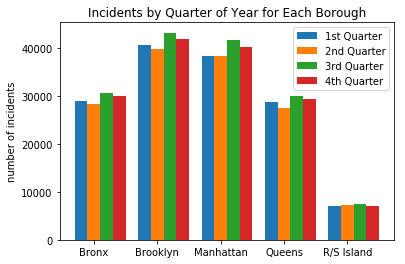

In [92]:
sql = '''
    SELECT alarm_box.borough, hour.quarter_of_year, count(*)
    FROM alarm_box, hour, rspns_time_facts
    WHERE alarm_box.key = rspns_time_facts.alarm_box_key
        AND hour.key = rspns_time_facts.incident_hour_key
    GROUP BY alarm_box.borough, hour.quarter_of_year
    ORDER BY hour.quarter_of_year, alarm_box.borough;
'''

c.execute(sql)
rows = c.fetchall()

subrows1 = [i for i in rows if i[1] == 1]
subrows2 = [i for i in rows if i[1] == 2]
subrows3 = [i for i in rows if i[1] == 3]
subrows4 = [i for i in rows if i[1] == 4]

ind = np.array([2*i for i in range(5)])
width = 0.4

fig, ax = plt.subplots()
ax.bar(ind,[i[2] for i in subrows1], width, label='1st Quarter')
ax.bar(ind + width,[i[2] for i in subrows2], width, label='2nd Quarter')
ax.bar(ind + 2*width,[i[2] for i in subrows3], width, label='3rd Quarter')
ax.bar(ind + 3*width,[i[2] for i in subrows4], width, label='4th Quarter')
ax.set_ylabel('number of incidents')
ax.set_title('Incidents by Quarter of Year for Each Borough')
ax.set_xticks(ind + width)
ax.set_xticklabels(('Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'R/S Island'))
ax.legend()

plt.show()

***Discussion***

Again, the visual display provides a more intuitive and easily digestible representation of the data.

## Incident distribution by month

***Check the data we want using SQL***

In [93]:
%%sql
SELECT hour.month_of_year, count(*)
FROM alarm_box, hour, rspns_time_facts
WHERE alarm_box.key = rspns_time_facts.alarm_box_key
    AND hour.key = rspns_time_facts.incident_hour_key
GROUP BY hour.month_of_year
ORDER BY hour.month_of_year;

 * postgresql://student@/proj4_group17
12 rows affected.


month_of_year,count
1,49186
2,48068
3,46314
4,45146
5,47816
6,48078
7,53059
8,51825
9,47912
10,50732


***Discussion***

When analyzing all the incident types, the frequency of events doesn't differ much throughout the year and the incidents by month appeart to be a uniform distribution.

***Visualize the data using Python***

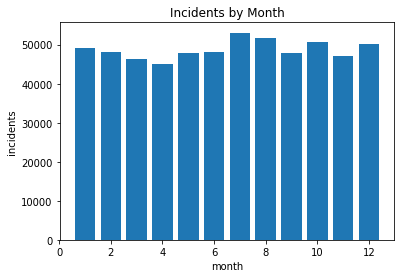

In [94]:
sql = '''
    SELECT hour.month_of_year, count(*)
    FROM alarm_box, hour, rspns_time_facts
    WHERE alarm_box.key = rspns_time_facts.alarm_box_key
        AND hour.key = rspns_time_facts.incident_hour_key
    GROUP BY hour.month_of_year
    ORDER BY hour.month_of_year;
'''

c.execute(sql)
rows = c.fetchall()

plt.bar([i[0] for i in rows], [i[1] for i in rows])
plt.xlabel("month")
plt.ylabel("incidents")
plt.title("Incidents by Month")
plt.show()

***Discussion***

The visualization provides a clear display of the approximately uniform distribution incidents by month.

### Fire incident distribution by month

***Check the data we want using SQL***

In [95]:
%%sql
SELECT hour.month_of_year, count(*)
FROM alarm_box, hour, incident_class, rspns_time_facts
WHERE alarm_box.key = rspns_time_facts.alarm_box_key
    AND hour.key = rspns_time_facts.incident_hour_key
    AND incident_class.key = rspns_time_facts.incident_class_key
    AND incident_class.group_des LIKE '%Fire%'
GROUP BY hour.month_of_year
ORDER BY hour.month_of_year;

 * postgresql://student@/proj4_group17
12 rows affected.


month_of_year,count
1,4092
2,3501
3,3575
4,3688
5,3322
6,3329
7,3377
8,3211
9,3186
10,3320


***Visualize the data using Python***

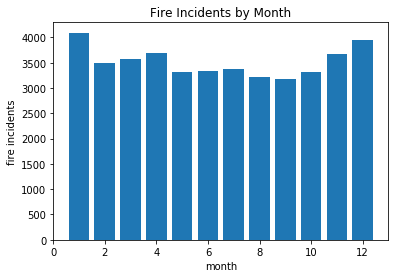

In [96]:
sql = '''
    SELECT hour.month_of_year, count(*)
    FROM alarm_box, hour, incident_class, rspns_time_facts
    WHERE alarm_box.key = rspns_time_facts.alarm_box_key
        AND hour.key = rspns_time_facts.incident_hour_key
        AND incident_class.key = rspns_time_facts.incident_class_key
        AND incident_class.group_des LIKE '%Fire%'
    GROUP BY hour.month_of_year
    ORDER BY hour.month_of_year;
'''

c.execute(sql)
rows = c.fetchall()

plt.bar([i[0] for i in rows], [i[1] for i in rows])
plt.xlabel("month")
plt.ylabel("fire incidents")
plt.title("Fire Incidents by Month")
plt.show()

***Discussion***

Contrary to our original hypothesis, fires actually appear to occur less frequently in the summer months when compared to the winter months. We suspect that the increased frequency in the winter months is attributable to the colder temparatures forcing people to use their heaters at a higher rate. Additionally, other variables, such as weather data, may provide more information on how temperature, humidity, and wind speed might affect the likelihood of a fire. Finally, we want to analyze how response times behave by borough and how response times might be affected by weather because the fires appear to occur more frequently in the colder months. 

## How does the Fire Department in each borough perform?

### Average, min, max incident response time for each borough

***Check the data we want using SQL***

In [97]:
%%sql
SELECT alarm_box.borough,
        min(rspns_time_facts.incident_rspns_s_qy), 
        max(rspns_time_facts.incident_rspns_s_qy),
        ROUND(avg(rspns_time_facts.incident_rspns_s_qy)::numeric, 2),
        ROUND(stddev(rspns_time_facts.incident_rspns_s_qy)::numeric, 2)
FROM alarm_box, rspns_time_facts
WHERE alarm_box.key = rspns_time_facts.alarm_box_key
GROUP BY alarm_box.borough;

 * postgresql://student@/proj4_group17
5 rows affected.


borough,min,max,round,round_1
RICHMOND / STATEN ISLAND,8,39485,300.94,302.23
QUEENS,6,12365,320.15,220.76
MANHATTAN,5,30322,329.16,207.95
BRONX,6,8123,324.86,181.54
BROOKLYN,6,16165,274.50,185.85


***Visualize the data using Python***

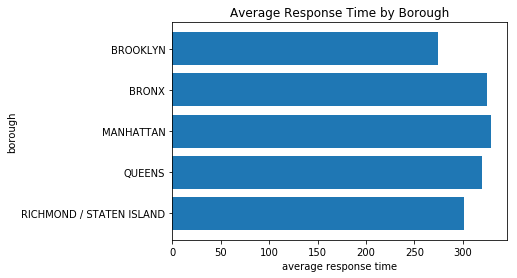

In [98]:
sql = '''
    SELECT alarm_box.borough,
            min(rspns_time_facts.incident_rspns_s_qy), 
            max(rspns_time_facts.incident_rspns_s_qy),
            ROUND(avg(rspns_time_facts.incident_rspns_s_qy)::numeric, 2),
            ROUND(stddev(rspns_time_facts.incident_rspns_s_qy)::numeric, 2)
    FROM alarm_box, rspns_time_facts
    WHERE alarm_box.key = rspns_time_facts.alarm_box_key
    GROUP BY alarm_box.borough;
'''

c.execute(sql)
rows = c.fetchall()

plt.barh([i[0] for i in rows], [i[3] for i in rows])
plt.xlabel("average response time")
plt.ylabel("borough")
plt.title("Average Response Time by Borough")
plt.show()

### Average, min, max incident response time by month for Richmond/Staten Island

***Check the data we want using SQL***

In [99]:
%%sql
SELECT hour.month_of_year,
        min(rspns_time_facts.incident_rspns_s_qy), 
        max(rspns_time_facts.incident_rspns_s_qy),
        ROUND(avg(rspns_time_facts.incident_rspns_s_qy)::numeric, 2) AS avg
FROM alarm_box, hour, rspns_time_facts
WHERE alarm_box.key = rspns_time_facts.alarm_box_key
    AND hour.key = rspns_time_facts.incident_hour_key
    AND alarm_box.borough = 'RICHMOND / STATEN ISLAND'
GROUP BY hour.month_of_year
ORDER BY hour.month_of_year;

 * postgresql://student@/proj4_group17
12 rows affected.


month_of_year,min,max,avg
1,8,3087,312.74
2,25,3082,314.79
3,10,3027,293.89
4,28,2071,297.15
5,11,3571,296.57
6,33,2261,295.60
7,23,2695,313.32
8,19,3690,291.33
9,18,3029,301.61
10,19,3114,290.33


### Average, min, max incident response time by month for Queens

***Check the data we want using SQL***

In [100]:
%%sql
SELECT hour.month_of_year,
        min(rspns_time_facts.incident_rspns_s_qy), 
        max(rspns_time_facts.incident_rspns_s_qy),
        ROUND(avg(rspns_time_facts.incident_rspns_s_qy)::numeric, 2) AS avg
FROM alarm_box, hour, rspns_time_facts
WHERE alarm_box.key = rspns_time_facts.alarm_box_key
    AND hour.key = rspns_time_facts.incident_hour_key
    AND alarm_box.borough = 'QUEENS'
GROUP BY hour.month_of_year
ORDER BY hour.month_of_year;

 * postgresql://student@/proj4_group17
12 rows affected.


month_of_year,min,max,avg
1,7,4807,341.97
2,13,7446,332.98
3,11,3991,308.14
4,18,11271,315.01
5,14,9291,312.58
6,12,5225,314.50
7,10,12365,332.32
8,10,3503,317.54
9,6,4508,317.62
10,12,5371,315.96


### Average, min, max incident response time by month for Manhattan

***Check the data we want using SQL***

In [101]:
%%sql
SELECT hour.month_of_year,
        min(rspns_time_facts.incident_rspns_s_qy), 
        max(rspns_time_facts.incident_rspns_s_qy),
        ROUND(avg(rspns_time_facts.incident_rspns_s_qy)::numeric, 2) AS avg
FROM alarm_box, hour, rspns_time_facts
WHERE alarm_box.key = rspns_time_facts.alarm_box_key
    AND hour.key = rspns_time_facts.incident_hour_key
    AND alarm_box.borough = 'MANHATTAN'
GROUP BY hour.month_of_year
ORDER BY hour.month_of_year;

 * postgresql://student@/proj4_group17
12 rows affected.


month_of_year,min,max,avg
1,9,3644,328.80
2,16,8476,344.91
3,10,4194,319.97
4,17,5457,325.07
5,9,7485,326.95
6,11,3174,327.00
7,5,7946,324.46
8,7,3927,328.90
9,9,3643,325.55
10,9,2793,326.64


### Average, min, max incident response time by month for Brooklyn

***Check the data we want using SQL***

In [102]:
%%sql
SELECT hour.month_of_year,
        min(rspns_time_facts.incident_rspns_s_qy), 
        max(rspns_time_facts.incident_rspns_s_qy),
        ROUND(avg(rspns_time_facts.incident_rspns_s_qy)::numeric, 2) AS avg
FROM alarm_box, hour, rspns_time_facts
WHERE alarm_box.key = rspns_time_facts.alarm_box_key
    AND hour.key = rspns_time_facts.incident_hour_key
    AND alarm_box.borough = 'BROOKLYN'
GROUP BY hour.month_of_year
ORDER BY hour.month_of_year;

 * postgresql://student@/proj4_group17
12 rows affected.


month_of_year,min,max,avg
1,8,10310,284.35
2,7,4615,280.02
3,8,16165,274.13
4,8,4173,273.71
5,12,9877,270.34
6,6,15100,272.36
7,6,14114,274.54
8,13,7136,274.64
9,7,11276,275.77
10,9,5837,270.04


### Average, min, max incident response time by month for Bronx

***Check the data we want using SQL***

In [103]:
%%sql
SELECT hour.month_of_year,
        min(rspns_time_facts.incident_rspns_s_qy), 
        max(rspns_time_facts.incident_rspns_s_qy),
        ROUND(avg(rspns_time_facts.incident_rspns_s_qy)::numeric, 2) AS avg
FROM alarm_box, hour, rspns_time_facts
WHERE alarm_box.key = rspns_time_facts.alarm_box_key
    AND hour.key = rspns_time_facts.incident_hour_key
    AND alarm_box.borough = 'BRONX'
GROUP BY hour.month_of_year
ORDER BY hour.month_of_year;

 * postgresql://student@/proj4_group17
12 rows affected.


month_of_year,min,max,avg
1,16,3740,337.61
2,17,2907,331.32
3,14,7017,317.37
4,6,5273,318.62
5,6,4417,313.56
6,14,2972,316.18
7,9,8123,327.46
8,10,4726,329.57
9,8,7785,325.05
10,10,5619,323.32


### Visualize all of the above tables together.

In [104]:
sql = '''
    SELECT hour.month_of_year,
            min(rspns_time_facts.incident_rspns_s_qy), 
            max(rspns_time_facts.incident_rspns_s_qy),
            ROUND(avg(rspns_time_facts.incident_rspns_s_qy)::numeric, 2) AS avg_rspns,
            ROUND(avg(rspns_time_facts.incident_travel_s_qy)::numeric, 2) AS avg_travel
    FROM alarm_box, hour, rspns_time_facts
    WHERE alarm_box.key = rspns_time_facts.alarm_box_key
        AND hour.key = rspns_time_facts.incident_hour_key
        AND alarm_box.borough = 'RICHMOND / STATEN ISLAND'
    GROUP BY hour.month_of_year
    ORDER BY hour.month_of_year;
'''
c.execute(sql)
rows1 = c.fetchall()

In [105]:
sql = '''
    SELECT hour.month_of_year,
            min(rspns_time_facts.incident_rspns_s_qy), 
            max(rspns_time_facts.incident_rspns_s_qy),
            ROUND(avg(rspns_time_facts.incident_rspns_s_qy)::numeric, 2) AS avg_rspns,
            ROUND(avg(rspns_time_facts.incident_travel_s_qy)::numeric, 2) AS avg_travel
    FROM alarm_box, hour, rspns_time_facts
    WHERE alarm_box.key = rspns_time_facts.alarm_box_key
        AND hour.key = rspns_time_facts.incident_hour_key
        AND alarm_box.borough = 'QUEENS'
    GROUP BY hour.month_of_year
    ORDER BY hour.month_of_year;
'''
c.execute(sql)
rows2 = c.fetchall()

In [106]:
sql = '''
    SELECT hour.month_of_year,
            min(rspns_time_facts.incident_rspns_s_qy), 
            max(rspns_time_facts.incident_rspns_s_qy),
            ROUND(avg(rspns_time_facts.incident_rspns_s_qy)::numeric, 2) AS avg_rspns,
            ROUND(avg(rspns_time_facts.incident_travel_s_qy)::numeric, 2) AS avg_travel
    FROM alarm_box, hour, rspns_time_facts
    WHERE alarm_box.key = rspns_time_facts.alarm_box_key
        AND hour.key = rspns_time_facts.incident_hour_key
        AND alarm_box.borough = 'MANHATTAN'
    GROUP BY hour.month_of_year
    ORDER BY hour.month_of_year;
'''
c.execute(sql)
rows3 = c.fetchall()

In [107]:
sql = '''
    SELECT hour.month_of_year,
            min(rspns_time_facts.incident_rspns_s_qy), 
            max(rspns_time_facts.incident_rspns_s_qy),
            ROUND(avg(rspns_time_facts.incident_rspns_s_qy)::numeric, 2) AS avg_rspns,
            ROUND(avg(rspns_time_facts.incident_travel_s_qy)::numeric, 2) AS avg_travel
    FROM alarm_box, hour, rspns_time_facts
    WHERE alarm_box.key = rspns_time_facts.alarm_box_key
        AND hour.key = rspns_time_facts.incident_hour_key
        AND alarm_box.borough = 'BROOKLYN'
    GROUP BY hour.month_of_year
    ORDER BY hour.month_of_year;
'''
c.execute(sql)
rows4 = c.fetchall()

In [108]:
sql = '''
    SELECT hour.month_of_year,
            min(rspns_time_facts.incident_rspns_s_qy), 
            max(rspns_time_facts.incident_rspns_s_qy),
            ROUND(avg(rspns_time_facts.incident_rspns_s_qy)::numeric, 2) AS avg_rspns,
            ROUND(avg(rspns_time_facts.incident_travel_s_qy)::numeric, 2) AS avg_travel
    FROM alarm_box, hour, rspns_time_facts
    WHERE alarm_box.key = rspns_time_facts.alarm_box_key
        AND hour.key = rspns_time_facts.incident_hour_key
        AND alarm_box.borough = 'BRONX'
    GROUP BY hour.month_of_year
    ORDER BY hour.month_of_year;
'''
c.execute(sql)
rows5 = c.fetchall()

***Average rsponse time by borough by month***

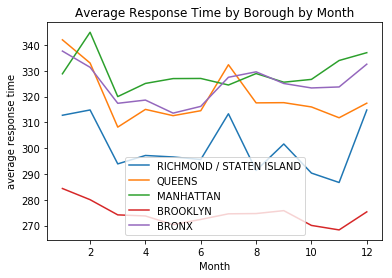

In [109]:
plt.plot([i[0] for i in rows1], [i[3] for i in rows1], label = "RICHMOND / STATEN ISLAND")
plt.plot([i[0] for i in rows2], [i[3] for i in rows2], label = "QUEENS")
plt.plot([i[0] for i in rows3], [i[3] for i in rows3], label = "MANHATTAN")
plt.plot([i[0] for i in rows4], [i[3] for i in rows4], label = "BROOKLYN")
plt.plot([i[0] for i in rows5], [i[3] for i in rows5], label = "BRONX")
plt.xlabel("Month")
plt.ylabel("average response time")
plt.title("Average Response Time by Borough by Month")
plt.legend(loc='best')
plt.show()

***Average travel time by borough by month***

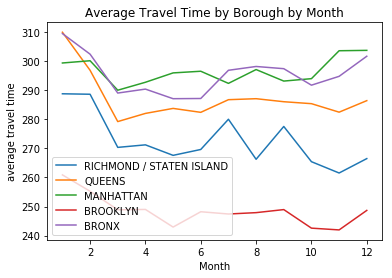

In [110]:
plt.plot([i[0] for i in rows1], [i[4] for i in rows1], label = "RICHMOND / STATEN ISLAND")
plt.plot([i[0] for i in rows2], [i[4] for i in rows2], label = "QUEENS")
plt.plot([i[0] for i in rows3], [i[4] for i in rows3], label = "MANHATTAN")
plt.plot([i[0] for i in rows4], [i[4] for i in rows4], label = "BROOKLYN")
plt.plot([i[0] for i in rows5], [i[4] for i in rows5], label = "BRONX")
plt.xlabel("Month")
plt.ylabel("average travel time")
plt.title("Average Travel Time by Borough by Month")
plt.legend(loc='best')
plt.show()

***Discussion***

Through our analysis, we identified that Brooklyn has the most incidents among 5 boroughs. However, it also has the overall fastest response time and travel time. Thus, we can conclude that Fire Department in Brooklyn is doing a very good job in responding to incidents and arriving to scenes in a timely manner.

Manhattan is the major borough of New York City. It has the second most incidents happened there but generally the most response time. While the major part of the response time is the travel time, and Manhattan has generally the most travel time, we conclude that the reason might be the traffic problem in Manhattan -- there are always traffic jams!!!

## Disconnect the database

In [111]:
c.close()
conn.close()

## Visualization with Tableau

***Heat map of severe fires by zip code in Brooklyn and Queens***

In [112]:
from IPython.display import Image
Image(url = "https://s3.amazonaws.com/2018-istm6212-group17/severe_fires_by_zip.png")

It seems that more severe fires happened at the junction of Queens and Brooklyn. There are five ZIPCODE areas with many severe fires.

# Bonus - Augment (10 points)

Sometimes the most value can be gained from one dataset when it is studied alongside data drawn from other sources. Identify and describe at least one additional data source that can complement your analysis. Pull this additional data into your chosen environment and explore at least one more theme you are able to further analyze that depends upon a combination of data from both sources.

## About the complementary data

For the bonus section, we decided to add weather data, [Historical Hourly Weather Data 2012-2017](https://www.kaggle.com/selfishgene/historical-hourly-weather-data#weather_description.csv), into the database. We want to include this data in our analysis because the winter months showed a higher frequency of fires and we expect that temperature, humidity, and wind speed may be important variables for better understanding the frequency of fires. Additionally, weather may play an important role for response times, with quick response times allowing the Fire Department to mitigate the risk of severe fires. 

## Obtain the `weather` data

In [113]:
!wget -O weather.zip https://s3.amazonaws.com/2018-istm6212-group17/historical-hourly-weather-data.zip

--2018-12-10 05:30:45--  https://s3.amazonaws.com/2018-istm6212-group17/historical-hourly-weather-data.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.0.77
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.0.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12556106 (12M) [application/zip]
Saving to: ‘weather.zip’

weather.zip         100%[===================>]  11.97M  32.5MB/s    in 0.4s    

2018-12-10 05:30:46 (32.5 MB/s) - ‘weather.zip’ saved [12556106/12556106]



In [114]:
!unzip -o weather.zip -d ./weather

Archive:  weather.zip
  inflating: ./weather/temperature.csv  
  inflating: ./weather/weather_description.csv  
  inflating: ./weather/wind_speed.csv  
  inflating: ./weather/city_attributes.csv  
  inflating: ./weather/humidity.csv  
  inflating: ./weather/pressure.csv  
  inflating: ./weather/wind_direction.csv  


## Filter and combine the data we want

In [115]:
!grep -E '^2016' weather/weather_description.csv | csvcut -c1,29 > description.txt

In [116]:
!grep -E '^2016' weather/temperature.csv | csvcut -c29 > temperature.txt

In [117]:
!grep -E '^2016' weather/humidity.csv | csvcut -c29 > humidity.txt

In [118]:
!grep -E '^2016' weather/pressure.csv | csvcut -c29 > pressure.txt

In [119]:
!grep -E '^2016' weather/wind_speed.csv | csvcut -c29 > wind_speed.txt

In [120]:
!wc -l *.txt

  8784 description.txt
  8784 humidity.txt
  8784 pressure.txt
  8784 temperature.txt
  8784 wind_speed.txt
 43920 total


In [121]:
!paste -d ',' description.txt temperature.txt humidity.txt pressure.txt wind_speed.txt > 2016_nyc_weather.csv

In [122]:
!sed -i 1i'hour,description,temperature,humidity,pressure,wind_speed' 2016_nyc_weather.csv

## Examine the data

In [123]:
!wc -l 2016_nyc_weather.csv

8785 2016_nyc_weather.csv


In [124]:
!csvstat --count 2016_nyc_weather.csv

Row count: 8784


In [125]:
!csvcut -n 2016_nyc_weather.csv

  1: hour
  2: description
  3: temperature
  4: humidity
  5: pressure
  6: wind_speed


In [126]:
!csvstat 2016_nyc_weather.csv

  1. "hour"

	Type of data:          DateTime
	Contains null values:  False
	Unique values:         8784
	Smallest value:        2016-01-01 00:00:00
	Largest value:         2016-12-31 23:00:00
	Most common values:    2016-01-01 00:00:00 (1x)
	                       2016-01-01 01:00:00 (1x)
	                       2016-01-01 02:00:00 (1x)
	                       2016-01-01 03:00:00 (1x)
	                       2016-01-01 04:00:00 (1x)

  2. "description"

	Type of data:          Text
	Contains null values:  False
	Unique values:         26
	Longest value:         31 characters
	Most common values:    sky is clear (2127x)
	                       broken clouds (1300x)
	                       mist (1187x)
	                       scattered clouds (936x)
	                       light rain (857x)

  3. "temperature"

	Type of data:          Number
	Contains null values:  False
	Unique values:         4260
	Smallest value:        255.07
	Largest value:         308.37
	Sum:                   2,

## Schema

***With the weather data, our final star schema is as follows***

In [127]:
from IPython.display import Image
Image(url = "https://s3.amazonaws.com/2018-istm6212-group17/star_schema_augmented.png")

## Create the `weather` dimension table

***Create the `weather` dimension table***

In [128]:
%%sql
DROP TABLE IF EXISTS weather;

CREATE TABLE weather (
    key SERIAL PRIMARY KEY,
    hour VARCHAR(20) NOT NULL,
    description VARCHAR(50) NOT NULL,
    temperature FLOAT NOT NULL,
    humidity FLOAT NOT NULL,
    pressure FLOAT NOT NULL,
    wind_speed FLOAT NOT NULL
);

 * postgresql://student@/proj4_group17
Done.
Done.


[]

***Load the data using `COPY` command***

In [129]:
!cp 2016_nyc_weather.csv /tmp/2016_nyc_weather.csv

In [130]:
%%sql
COPY weather (hour, description, temperature, humidity, pressure, wind_speed)
FROM '/tmp/2016_nyc_weather.csv'
CSV
HEADER;

 * postgresql://student@/proj4_group17
8784 rows affected.


[]

***Change the unit of temperature from Kelvin to Celsius***

In [131]:
%%sql
UPDATE weather
SET temperature = ROUND((temperature - 272.15)::numeric, 2);

 * postgresql://student@/proj4_group17
8784 rows affected.


[]

***Take a look at the `weather` dimension table***

In [132]:
%%sql
SELECT * FROM weather ORDER BY key LIMIT 5;

 * postgresql://student@/proj4_group17
5 rows affected.


key,hour,description,temperature,humidity,pressure,wind_speed
1,2016-01-01 00:00:00,broken clouds,7.39,65.0,1019.0,3.0
2,2016-01-01 01:00:00,broken clouds,7.27,73.0,1019.0,3.0
3,2016-01-01 02:00:00,overcast clouds,6.88,100.0,1020.0,4.0
4,2016-01-01 03:00:00,overcast clouds,6.72,89.0,1019.0,4.0
5,2016-01-01 04:00:00,broken clouds,6.2,56.0,1019.0,4.0


In [133]:
%%sql
SELECT COUNT(*) FROM weather;

 * postgresql://student@/proj4_group17
1 rows affected.


count
8784


***Add a foreign key column to the fact table that references `weather` dimension table***

In [134]:
%%sql
ALTER TABLE rspns_time_facts 
ADD COLUMN weather_key INTEGER,
ADD CONSTRAINT fk_weather_key
    FOREIGN KEY (weather_key)
    REFERENCES weather (key);

 * postgresql://student@/proj4_group17
Done.


[]

***Populate `weather_key` with correct values***

In [135]:
%%sql
UPDATE rspns_time_facts
SET weather_key = weather.key
FROM weather, hour 
WHERE rspns_time_facts.incident_hour_key = hour.key 
    AND hour.hour = weather.hour;

 * postgresql://student@/proj4_group17
585519 rows affected.


[]

***Check the foreign key column***

In [136]:
%%sql
SELECT id, weather_key
FROM rspns_time_facts
LIMIT 5;

 * postgresql://student@/proj4_group17
5 rows affected.


id,weather_key
1600336540120618,68
1600451140150038,75
1600439810120123,80
1600404590140231,82
1600471140150219,84


In [137]:
%%sql
SELECT COUNT(*) AS weather_key_not_null_count
FROM rspns_time_facts
WHERE weather_key IS NOT NULL;

 * postgresql://student@/proj4_group17
1 rows affected.


weather_key_not_null_count
585519


In [138]:
%%sql
SELECT COUNT(*) AS weather_key_null_count
FROM rspns_time_facts
WHERE weather_key IS NULL;

 * postgresql://student@/proj4_group17
1 rows affected.


weather_key_null_count
0


***Take a look at the final `rspns_time_facts` table***

In [139]:
%%sql
SELECT * FROM rspns_time_facts LIMIT 10;

 * postgresql://student@/proj4_group17
10 rows affected.


id,dispatch_rspns_s_qy,incident_rspns_s_qy,incident_travel_s_qy,alarm_box_key,alarm_key,incident_class_key,valid_rspns_key,incident_hour_key,incident_close_hour_key,weather_key
1600439810120123,26,442,416,10497,51,18,2,80,80,80
1600404590140231,None,None,None,27600,30,58,1,82,83,82
1600471140150219,5,None,None,11203,10,2,1,84,84,84
1600409290110554,4,None,None,1923,10,2,1,86,86,86
1600455080150301,6,221,215,25290,24,3,2,86,86,86
1600458980150387,33,739,706,32410,13,33,1,88,89,88
1600478690150477,7,None,None,21686,10,2,1,90,90,90
1600413470240631,5,None,None,17656,24,3,1,91,92,91
1600467510150633,5,None,None,11081,10,2,1,94,94,94
1600484550211083,83,429,346,33601,30,9,2,95,95,95


## Analysis with the weather data

### Show Tables in our database

In [140]:
%%sql
\dt

 * postgresql://student@/proj4_group17
7 rows affected.


Schema,Name,Type,Owner
public,alarm,table,student
public,alarm_box,table,student
public,hour,table,student
public,incident_class,table,student
public,rspns_time_facts,table,student
public,valid_rspns,table,student
public,weather,table,student


### Connect the database with Python for Visualization

In [141]:
import psycopg2
import geocoder
import matplotlib.pyplot as plt
import pandas
import numpy as np

conn = psycopg2.connect("dbname='proj4_group17' user='student'")
c = conn.cursor()

### Distribution of temperature values of fire incidents

***Check the data we want using SQL***

In [142]:
%%sql
SELECT rspns_time_facts.id, weather.temperature
FROM weather, rspns_time_facts, incident_class
WHERE rspns_time_facts.weather_key = weather.key
    AND rspns_time_facts.incident_class_key = incident_class.key
    AND incident_class.group_des LIKE '%Fire%'
LIMIT 10;

 * postgresql://student@/proj4_group17
10 rows affected.


id,temperature
1600577750150225,-11.16
1600787130150316,-2.65
1600878620150509,6.7
1600827370141054,6.42
1601222320640636,4.51
1601373050150187,-4.27
1601411690110448,-4.35
1601544300150422,5.09
1601525170220468,7.5
1602221650150299,-6.3


***Visualize the data using Python***

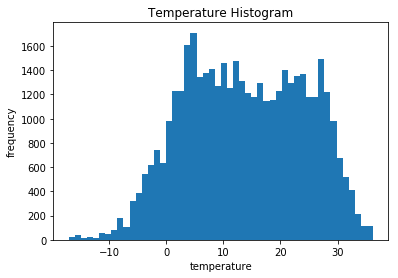

In [143]:
sql = '''
SELECT weather.temperature
FROM weather, rspns_time_facts, incident_class
WHERE rspns_time_facts.weather_key = weather.key
    AND rspns_time_facts.incident_class_key = incident_class.key
    AND incident_class.group_des LIKE '%Fire%';
'''
c.execute(sql)
rows = c.fetchall()

plt.hist([i[0] for i in rows], bins = 50)
plt.xlabel("temperature")
plt.ylabel("frequency")
plt.title("Temperature Histogram")
plt.show()

***Discussion***

Based on the temperature plot, we can see peaks at certain temperatures, such as between 0 and 5 degrees celsius, that coincide with a higher frequency of fires in the winter months.

### Distribution of humidity values of fire incidents

***Check the data we want using SQL***

In [144]:
%%sql
SELECT rspns_time_facts.id, weather.humidity
FROM weather, rspns_time_facts, incident_class
WHERE rspns_time_facts.weather_key = weather.key
    AND rspns_time_facts.incident_class_key = incident_class.key
    AND incident_class.group_des LIKE '%Fire%'
LIMIT 10;

 * postgresql://student@/proj4_group17
10 rows affected.


id,humidity
1602221650150299,53.0
1602531520450796,43.0
1602542590120835,53.0
1602547880351205,64.0
1602607360140962,78.0
1602707360440031,96.0
1602770510140410,65.0
1602728760140153,55.0
1602794300150394,36.0
1602874240150073,66.0


***Visualize the data using Python***

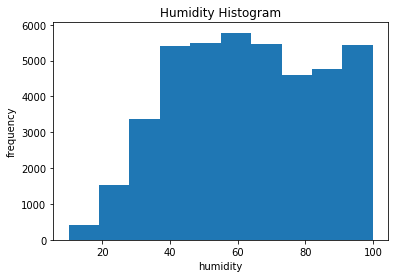

In [145]:
sql = '''
SELECT weather.humidity
FROM weather, rspns_time_facts, incident_class
WHERE rspns_time_facts.weather_key = weather.key
    AND rspns_time_facts.incident_class_key = incident_class.key
    AND incident_class.group_des LIKE '%Fire%';
'''
c.execute(sql)
rows = c.fetchall()

plt.hist([i[0] for i in rows])
plt.xlabel("humidity")
plt.ylabel("frequency")
plt.title("Humidity Histogram")
plt.show()

***Discussion***

Based on the humidity plot, we actually see a negatively-skewed distribution. We find this odd because we expect dryer air to lead to more fires. However, the high levels of humidity, defined as between 80% and 100% humidity, may represent severe weather scenarios, such as strong rain and even snow storms. These severe storms may be part of the cause for additional fires.

### Average travel time by different weather situation

***Check the data we want using SQL***

In [146]:
%%sql
SELECT weather.description, 
        ROUND(AVG(incident_travel_s_qy)::numeric, 2)
FROM rspns_time_facts
JOIN weather
    ON rspns_time_facts.weather_key = weather.key
GROUP BY weather.description
ORDER BY AVG(incident_travel_s_qy) DESC;

 * postgresql://student@/proj4_group17
26 rows affected.


description,round
heavy snow,425.93
thunderstorm with light drizzle,334.88
sand,325.70
snow,308.79
thunderstorm with heavy rain,301.61
light snow,293.96
fog,287.81
freezing rain,287.53
light intensity drizzle,286.11
mist,283.57


***Visualize the data using Python***

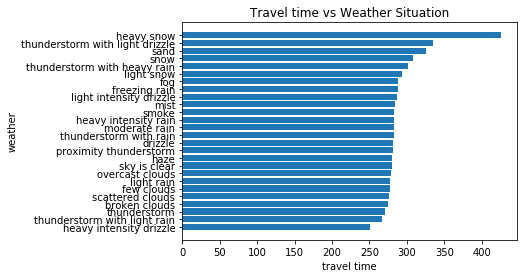

In [147]:
sql = '''
SELECT weather.description,
        ROUND(AVG(incident_travel_s_qy)::numeric, 2)
FROM rspns_time_facts
JOIN weather
    ON rspns_time_facts.weather_key = weather.key
GROUP BY weather.description
ORDER BY AVG(incident_travel_s_qy);
'''
c.execute(sql)
rows = c.fetchall()

plt.barh([i[0] for i in rows], [i[1] for i in rows])
plt.xlabel("travel time")
plt.ylabel("weather")
plt.title("Travel time vs Weather Situation")
plt.show()

***Discussion***

Finally, we plotted the response times by the weather category description to find a few interesting results. For example, the Heavy Snow appears to significantly increase response times accross all the boroughs. So, we recommend that the New York City Fire Department understand the increased frequency of fires in the winter months paired with the difficulties of providing quick response times in Heavy Snow has the potential to lead to severe fires with the potential to cause serious consequences that include the loss of property, life, and emotional well-being.

## Disconnect the database

In [148]:
c.close()
conn.close()

**Disclaimer**

All members worked on the project individually from the top to the end and met together for the finding discussions. Everyone contributed substantially to the work.